# Wave equation 2d

$$ \frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)$$

An explicit pattern over time, in 1d:

$$u_i^{j+1} = 2 u_i^{j} - u_i^{j-1} + \frac{\Delta t^2 c^2}{\Delta x^2}\left(u_{i-1}^{j}+u_{i+1}^{j}-2 u_i^{j}\right)$$


 - upper index is the time of the bottom space
 - the scheme is stable for small $\frac{\Delta t^2 c^2}{\Delta x^2}$.




1. Implement a similar scheme on CUDA in 2d or 3d,
2. Examine the performance and compare with the diagram in numpy.
3. Find an interesting example of a system that can be simulated on CUDA.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import time
import numpy as np 
from IPython.core.display import display,clear_output


## Visualization helpers

We can easily visualize 2d scalar fields in Jupyter notebook using bitmap. An efficient version will use `BytesIO` as a virtual file in which Image will be created.

In [0]:
from PIL import Image

from IPython.core import display
from io import BytesIO
from IPython.core.display import clear_output

def display_pil_image(im):
    """Displayhook function for PIL Images, rendered as PNG."""

    b = BytesIO()
    im.save(b, format='png')
    data = b.getvalue()

    ip_img = display.Image(data=data, format='png', embed=True)
    return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)


def plot_as_im(u,a=-1,b=1):
    u = ((u-a)/(b-a))
    u[u>b] = b
    u[u<a] = a
    im = Image.fromarray(np.uint8(255*u))
    clear_output(wait=True)
    display.display(im)

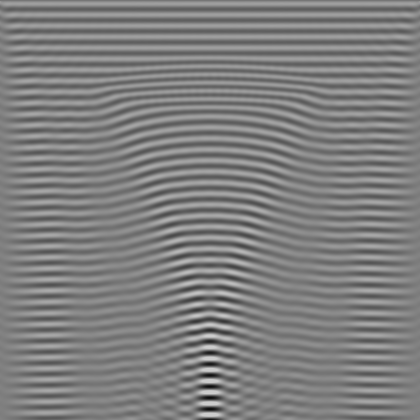

In [5]:
scale = 3
N = 140*scale
l = 100.

dx = float(l)/(N-1)

c = .45
c2 = c**2
dt = 0.018
x = np.linspace(0,l,N)
y = np.linspace(0,l,N)
X,Y = np.meshgrid(x,y)

u = np.zeros((N,N))
u0 = np.zeros((N,N))
unew = np.zeros((N,N))



cx = np.ones_like(u)
cx = c2*cx


cx[ ((X-l/2)**2+(Y-73)**2>60**2)*(Y<l/5)+((X-l/2)**2+(Y+33)**2>60**2)*(Y>l/5) ] = (0.6**2)

for i in range(100):
    cx[1:-1,1:-1] = cx[1:-1,1:-1] + 0.1*(np.diff(cx,2,axis=0)[:,1:-1]+np.diff(cx,2,axis=1)[1:-1,:])




ulst=[u.copy()]

n = 2
T = .30*l/((n+0.25))/scale


a,b = -.8,.8 #min/max for plotting

for i in range(12500):

    unew[1:-1,1:-1] = 2*u[1:-1,1:-1] - u0[1:-1,1:-1] +\
     dt**2 *cx[1:-1,1:-1]/dx**2*(np.diff(u,2,axis=0)[:,1:-1] + np.diff(u,2,axis=1)[1:-1,:])
    u0=u.copy()
    u=unew.copy()
    
    u[0,:] = u[1,:] - dx/dt*(u[1,:]-u0[1,:])
    u[-1,:] = u[-2,:] - dx/dt*(u[-2,:]-u0[-2,:])
    u[:,0] = u[:,1]- dx/dt*(u[:,1]-u0[:,1]) 
    u[:,-1] = u[:,-2]- dx/dt*(u[:,-2]-u0[:,-2])
   
 
    u[0,:] = 0.2*np.sin(dt*i/T*2.0*np.pi)
    
    if i%40 == 0:
        ulst.append(u.copy())
        plot_as_im(u,a,b)
     
        
        

In [0]:
print(" CFL number: (<<1) ",c*dt/dx)


In [0]:
for i,u_ in enumerate(ulst):
    plt.imshow(u_)
    clear_output(wait=True)
    plt.show()

## Geometry - "lens"

We create medium with two different properties (speed of light) inside and outside area enclosed between two intersecting circles.

In [0]:
c = np.ones_like(u)

c[ ((X-l/2)**2+(Y-73)**2>60**2)*(Y<l/5)+((X-l/2)**2+(Y+33)**2>60**2)*(Y>l/5) ] = .20

#c[ X+2*Y>145 ] = 2
#c[ (X-l/2)**2+(Y-l/3)**2>25**2 ] = 2.0
    


for i in range(120):
    c[1:-1,1:-1] = c[1:-1,1:-1] + 0.1*(np.diff(c,2,axis=0)[:,1:-1]+np.diff(c,2,axis=1)[1:-1,:])
plt.imshow(c,origin='upper')

In [0]:
plt.plot(c[75,:])

\newpage